In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv("C:/Users/rihar/OneDrive/Dators/macibu materials/coursera/pitonis/DataScience Capstone/dataset_part_2.csv")
df.head(3)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0


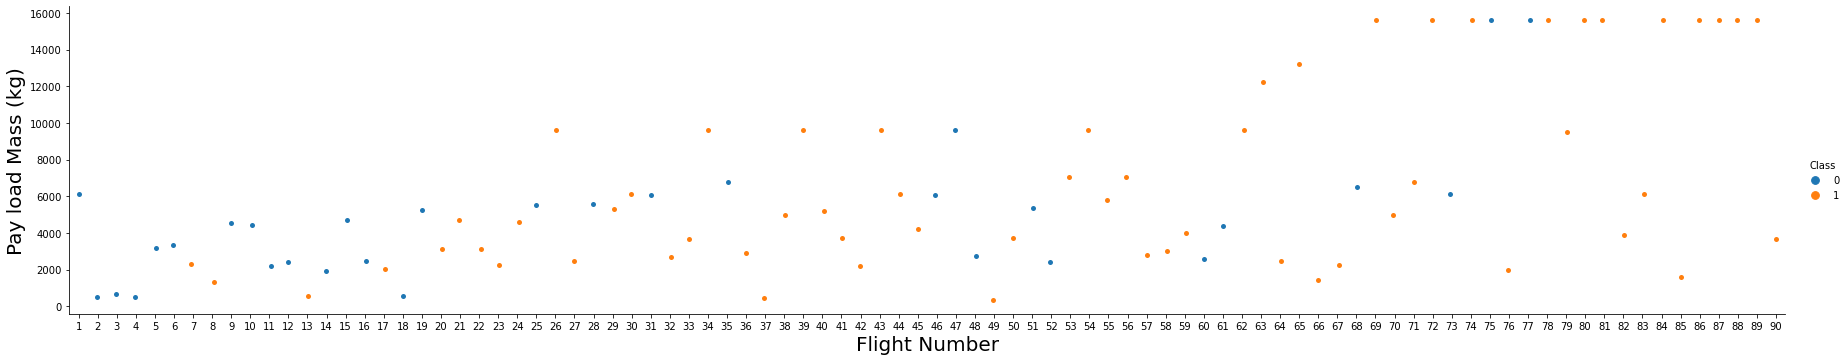

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

# Tasks

### Task 1

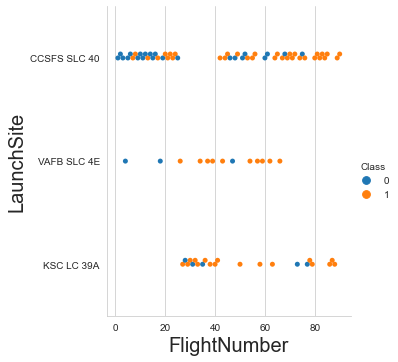

In [87]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.set_style("whitegrid")
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, aspect=1,kind='swarm')
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

**explanation:**  Yooo guys!! There are three different launch sites for the Falcon 9 and Falcon Heavy launches. They are:
* 'CCSFS SLC 40'
* 'VAFB SLC 4E'
* 'KSC LC 39A'

We can see, that they started using two launch sites at the start, 'CCSFS SLC 40' and 'VAFB SLC 4E', but mainly was used the first one. After 20 or so launches, they used the 'KSC LC 39A' Launch site. The second site was discontinued after a while, probably a reason for that. But the first launch site is the most prominent of them all, obviously

### Task 2

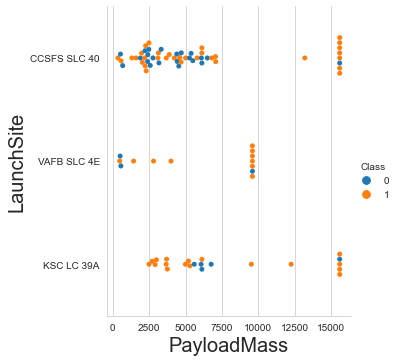

In [19]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df, kind='swarm')
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000). 

So we know why the second site was not used that often, they use it mainly for less than 10000 kg payload launches, nice


### Task 3

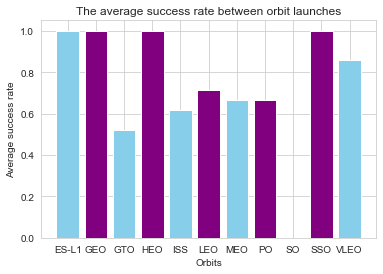

In [29]:
# Next, we want to visually check if there are any relationship between success rate and orbit type.
dfgroup = df.groupby(['Orbit'])['Class'].mean().reset_index()
colors = ['skyblue','purple']
plt.bar(dfgroup['Orbit'],dfgroup['Class'],color=colors)
plt.xlabel('Orbits')
plt.ylabel('Average success rate')
plt.title('The average success rate between orbit launches')

plt.show()

gawd damn man, im back again

As we see, there are different orbits used for launches, im not gonna name or describe them, idk.

But i can confidently say, that SO orbit launches either havent happened yet or have been **really bad**.

The most successful launches have been to the ES-L1, GEO, HEO, SSO and VLEO launches, where the success rate is above 80%

### Task 4

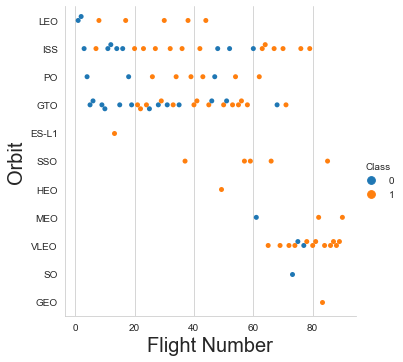

In [30]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='FlightNumber', y='Orbit', hue='Class', data=df, kind='swarm')
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be less of a relationship between flight number when in GTO orbit. we can see here, that SO orbit had one launch and it didnt go that great, good to know.

### Task 5

C:\Tools\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Tools\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Tools\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


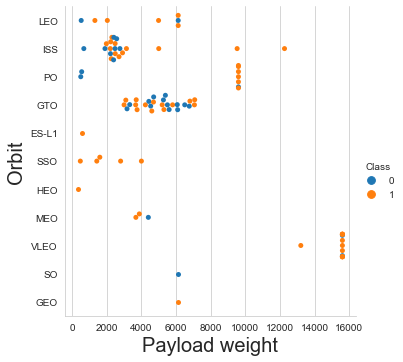

In [35]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

sns.catplot(x='PayloadMass', y='Orbit', hue='Class', data=df, kind='swarm')
plt.xlabel("Payload weight",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### Task 6 

In [64]:
# A function to Extract years from the date 

def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
year = []
year = Extract_year(df['Date']) 

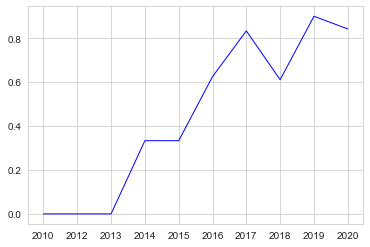

In [72]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
dfgrop['gadi'] = year
dfgrop = df
grop = dfgrop.groupby(['gadi'])['Class'].mean().reset_index()
plt.plot(grop['gadi'],grop['Class'],color='blue',linewidth=1)

You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## FEATURES ENGINEERING

In [73]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Task 7

In [75]:
# HINT: Use get_dummies() function on the categorical columns
hot_features = pd.get_dummies(features, columns=['Orbit','LaunchSite','LandingPad','Serial'])
hot_features.head(3)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Task 8

In [76]:
hot_features =hot_features.astype('float64')
hot_features.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

## YOU DONE DID IT

In [79]:
hot_features.to_csv('dataset_part_3.csv', index=False)